In [1]:
import tensorflow as tf
print("TF Version:", tf.__version__)
import tensorflow_hub as hub
print("TF hub Version:", hub.__version__)
print("GPU", "availabe" if tf.config.list_physical_devices("GPU") else "not availabe")
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

TF Version: 2.6.0
TF hub Version: 0.12.0
GPU availabe


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2643722951892616961, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11345264640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17279879446344946305
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [2]:

!gdown --id 1UCGzcV5ZTC51ShC8hFrE2esC-MdlvRn- 
!gdown --id 1bu048J7cfuNJpcIlJO2_KIg_tY3IX7p8

Downloading...
From: https://drive.google.com/uc?id=1UCGzcV5ZTC51ShC8hFrE2esC-MdlvRn-
To: /content/Fresh.zip
100% 172M/172M [00:01<00:00, 171MB/s]
Downloading...
From: https://drive.google.com/uc?id=1bu048J7cfuNJpcIlJO2_KIg_tY3IX7p8
To: /content/Withered.zip
100% 230M/230M [00:01<00:00, 149MB/s]


In [4]:
import zipfile
local_zip = '/content/Fresh.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content')
#zip_ref.extractall('/content')
zip_ref.close()

local_zip = '/content/Withered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content')
#zip_ref.extractall('/FileStore/tables/tealeaf/content')
zip_ref.close()

In [5]:
import os 
import numpy as np
np.random.seed(777)
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import keras.backend as k


from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model

In [6]:
train_dir = '/content/Fresh/'
test_dir = '/content/Fresh/'

for root,dirs,files in os.walk(train_dir):
    print (root, len(files))
print("-"*70)
for root,dirs,files in os.walk(test_dir):
    print (root, len(files))

/content/Fresh/ 0
/content/Fresh/Best 153
/content/Fresh/Below Best 73
/content/Fresh/Poor 43
----------------------------------------------------------------------
/content/Fresh/ 0
/content/Fresh/Best 153
/content/Fresh/Below Best 73
/content/Fresh/Poor 43


In [7]:
output_classes = 3
batch_size = 32
img_height, img_width = 224,224
input_shape = (img_height, img_width, 3)
epochs = 20
nb_train_samples = 269
nb_test_samples = 269

In [8]:
random_seed = np.random.seed(1142)
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    featurewise_center=True,
    featurewise_std_normalization=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = True,
    class_mode='categorical')


test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    seed = random_seed,
    shuffle = False,
    class_mode='categorical')


Found 269 images belonging to 3 classes.
Found 269 images belonging to 3 classes.


In [9]:
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
adam_opt = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-5)
model = Sequential()

model.add(VGG19(weights = "imagenet", include_top=False, pooling = 'avg'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=output_classes, activation='softmax'))

model.layers[0].trainable = True

80150528/80134624 [==============================] - 1s 0us/step


In [10]:
model.compile(optimizer= adam_opt,
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 1539      
Total params: 20,025,923
Trainable params: 20,025,923
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit_generator(
  train_generator,
  steps_per_epoch = (nb_train_samples)//batch_size,
  #steps_per_epoch = nb_train_samples // batch_size,
  epochs = epochs,
  validation_data = test_generator,
  validation_steps = (nb_test_samples)//batch_size) # if you have test data

  #validation_steps = nb_test_samples // batch_size)

Epoch 1/20
8/8 [==============================] - 75s 4s/step - loss: 1.1270 - accuracy: 0.4641 - val_loss: 0.9043 - val_accuracy: 0.5977
Epoch 2/20
8/8 [==============================] - 22s 3s/step - loss: 1.0691 - accuracy: 0.5316 - val_loss: 0.8963 - val_accuracy: 0.5977
Epoch 3/20
8/8 [==============================] - 23s 3s/step - loss: 1.0132 - accuracy: 0.5703 - val_loss: 0.8456 - val_accuracy: 0.5977
Epoch 4/20
8/8 [==============================] - 22s 3s/step - loss: 0.9335 - accuracy: 0.5485 - val_loss: 0.7771 - val_accuracy: 0.6328
Epoch 5/20
8/8 [==============================] - 22s 3s/step - loss: 0.8614 - accuracy: 0.6076 - val_loss: 0.6896 - val_accuracy: 0.7109
Epoch 6/20
8/8 [==============================] - 22s 3s/step - loss: 0.8159 - accuracy: 0.6582 - val_loss: 0.6152 - val_accuracy: 0.7305
Epoch 7/20
8/8 [==============================] - 22s 3s/step - loss: 0.7474 - accuracy: 0.6835 - val_loss: 0.5771 - val_accuracy: 0.7500
Epoch 8/20
8/8 [==================

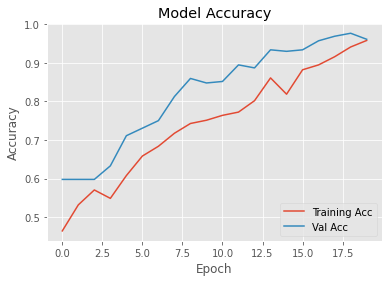

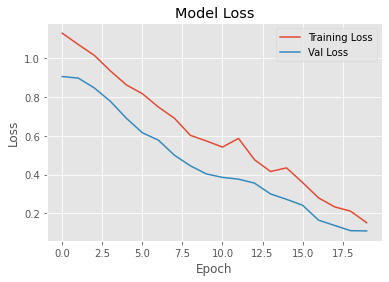

In [12]:
plt.style.use("ggplot")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Acc', 'Val Acc'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Val Loss'], loc='upper right')
plt.show()

In [13]:
filename = test_generator.filenames
truth = test_generator.classes
label = test_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

predicts = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
predict_class = np.argmax(predicts, axis=1)
errors = np.where(predict_class != truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

8/8 [==============================] - 10s 1s/step
No of errors = 10/269


Confusion Matrix
[[ 68   5   0]
 [  3 150   0]
 [  1   1  41]]


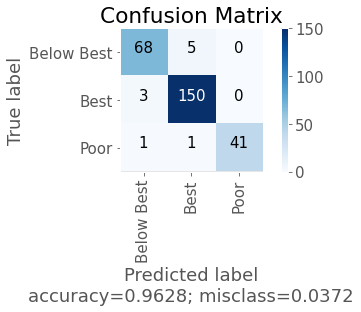

<Figure size 2160x2160 with 0 Axes>

In [14]:
from sklearn import preprocessing
plt.rcParams["axes.grid"] = False
plt.rcParams.update({'font.size': 15})

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(truth,predict_class)

labels = []
for k,v in indexlabel.items():
    labels.append(v)
    
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    print(cm)
#     fig = plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass)) 
    plt.figure(figsize=(30,30))


plot_confusion_matrix(cm, classes=labels,
                      title='Confusion Matrix')


In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
y_pred = predicts
y_pred_probabilities=y_pred

y_pred = np.argmax(y_pred,axis = 1) 
y_actual = test_generator.classes

classnames=[]
for classname in test_generator.class_indices:
    classnames.append(classname)
target_names = classnames
print(classification_report(y_actual, y_pred, target_names=target_names))

              precision    recall  f1-score   support

  Below Best       0.94      0.93      0.94        73
        Best       0.96      0.98      0.97       153
        Poor       1.00      0.95      0.98        43

    accuracy                           0.96       269
   macro avg       0.97      0.96      0.96       269
weighted avg       0.96      0.96      0.96       269



In [16]:
model.save('/content/Models/Fresh-model.h5')
model.save_weights('/content/Models/Fresh-Weights.h5')

In [17]:
import pickle
pickle.dump(model, open('Fresh_model.pkl', 'wb'))

TypeError: ignored

In [18]:
import joblib
joblib.dump('Withered_model.pkl')


TypeError: ignored

In [19]:
import joblib
filename = 'Fresh_model.sav'
joblib.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

TypeError: ignored

In [20]:
from keras.models import model_from_json
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('fresh_model.json', 'w') as json_file:
    json_file.write(json_model)